In [86]:
# 1. 데이터 가져오기
import pandas as pd

train_data = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test_data = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [87]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [88]:
print(len(train_data.keys()))
train_data.keys()

12


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [89]:
print(len(test_data.keys()))
test_data.keys()

9


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [93]:
train_data['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [91]:
# 2. datetime 컬럼을 datetime 자료형으로 변환하고
# 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train_datetime = pd.to_datetime(train_data['datetime'])

In [97]:
train_data['year'] = pd.DatetimeIndex(train_datetime).year
train_data['month'] = pd.DatetimeIndex(train_datetime).month
train_data['day'] = pd.DatetimeIndex(train_datetime).day
train_data['hour'] = pd.DatetimeIndex(train_datetime).hour
train_data['minute'] = pd.DatetimeIndex(train_datetime).minute
train_data['second'] = pd.DatetimeIndex(train_datetime).second


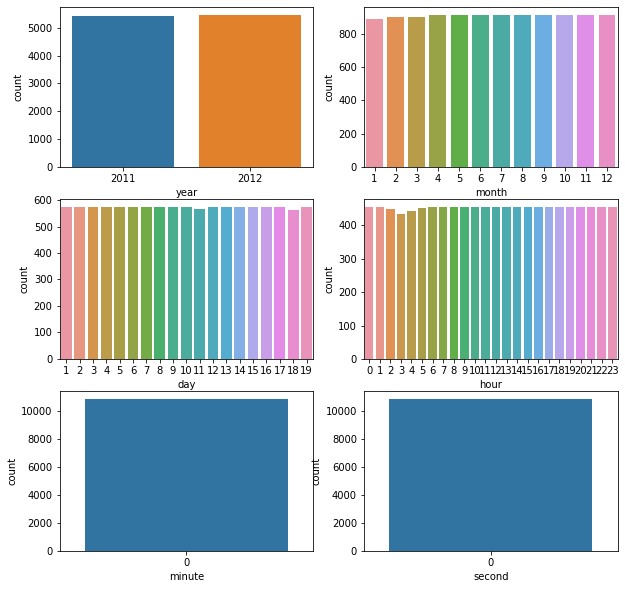

In [98]:
# 3. year, month, day, hour, minute, second 데이터 개수 시각화
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10,10)

sns.countplot(train_data['year'], ax=ax[0][0])
sns.countplot(train_data['month'], ax=ax[0][1])
sns.countplot(train_data['day'], ax=ax[1][0])
sns.countplot(train_data['hour'], ax=ax[1][1])
sns.countplot(train_data['minute'], ax=ax[2][0])
sns.countplot(train_data['second'], ax=ax[2][1])


plt.show()

In [99]:
# 데이터 확인
print(len(train_data.keys()))
# 6개 증가 : 'year', 'month', 'day', 'hour', 'minute', 'second'
train_data.keys() 

18


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [100]:
# 4. X, y 컬럼 선택

'''
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
'''
train_data = train_data.drop(labels =['datetime', 'windspeed', 'casual', 'registered', 'minute', 'second'], axis=1)

In [101]:
print(len(train_data.keys()))
train_data.keys()

12


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [107]:
# 4. train/test 데이터 분리
x = train_data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity','year', 'month', 'day', 'hour']].values
y = train_data['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8708, 11)
(2178, 11)
(8708,)
(2178,)


In [109]:
# 5. LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [111]:
pred = model.predict(X_test)
print(pred)

[-32.49610684  57.1135002  114.48296458 ... 193.9166827  191.42895323
 291.61363497]


In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse', mse)
print('rmse', rmse)

mse 19778.207180646416
rmse 140.6350140635198


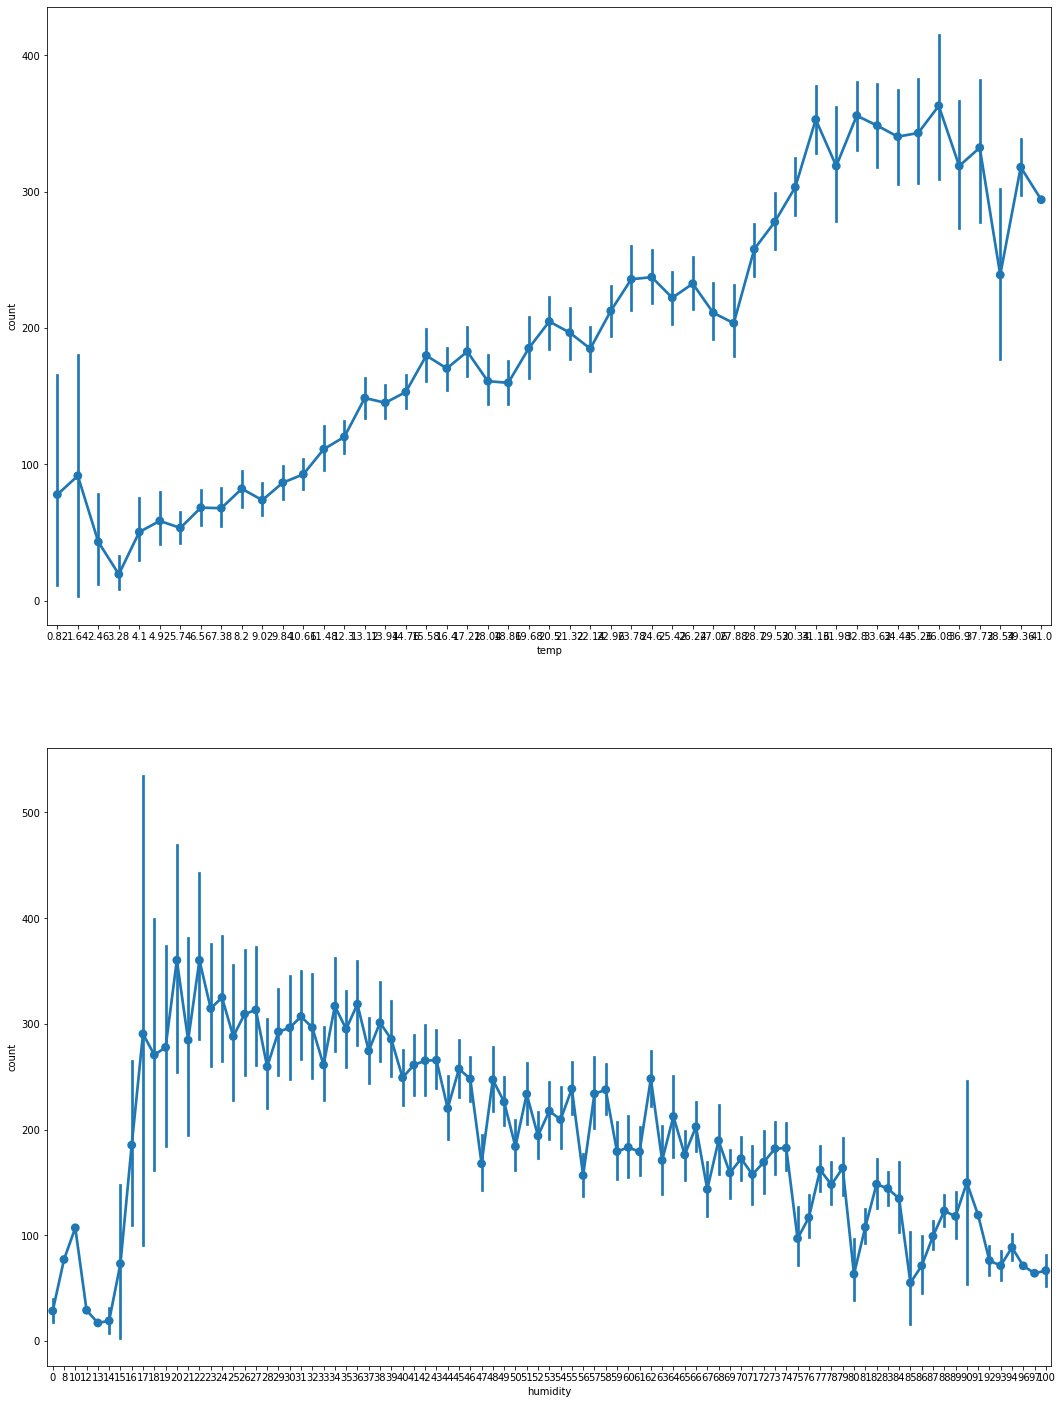

In [121]:
# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화

# plt.xlabel('temp')
# plt.ylabel('count')

# plt.xlabel('humidity')
# plt.ylabel('count')


fig, (ax1, ax2)=plt.subplots(nrows=2)
fig.set_size_inches(18,25)

sns.pointplot(data=train_data, x="temp", y="count", ax=ax1)
sns.pointplot(data=train_data, x="humidity", y="count",ax=ax2)
plt.show()